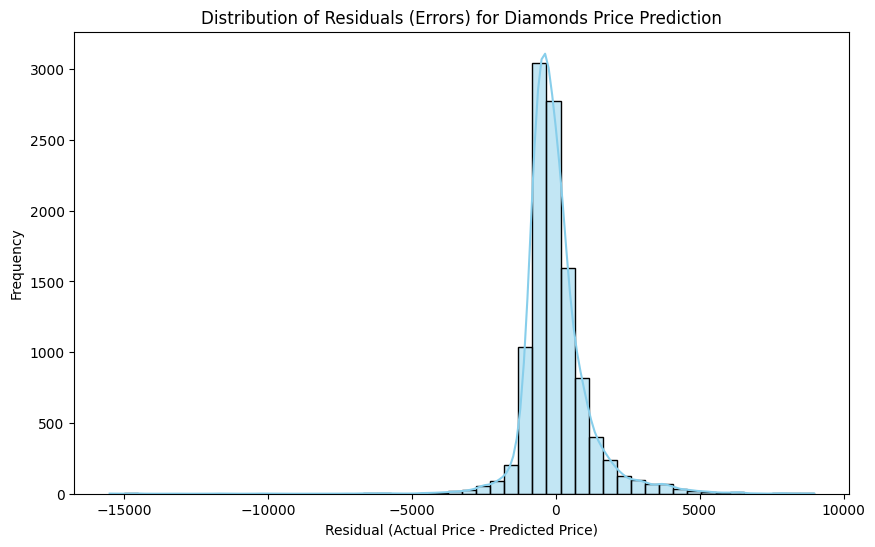

In [1]:
#Q1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the diamonds dataset
df = sns.load_dataset('diamonds')

# Select features and target
X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = df['price']

# One-hot encode categorical variables
categorical_cols = ['cut', 'color', 'clarity']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Visualize the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50, color='skyblue')
plt.title('Distribution of Residuals (Errors) for Diamonds Price Prediction')
plt.xlabel('Residual (Actual Price - Predicted Price)')
plt.ylabel('Frequency')
plt.show()


In [2]:
#Q2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from math import sqrt

# Generate a sample regression dataset
X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 154.63
Mean Absolute Error (MAE): 9.67
Root Mean Squared Error (RMSE): 12.43


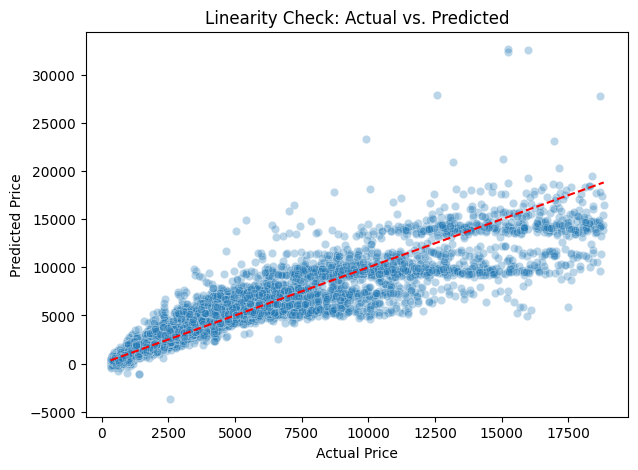

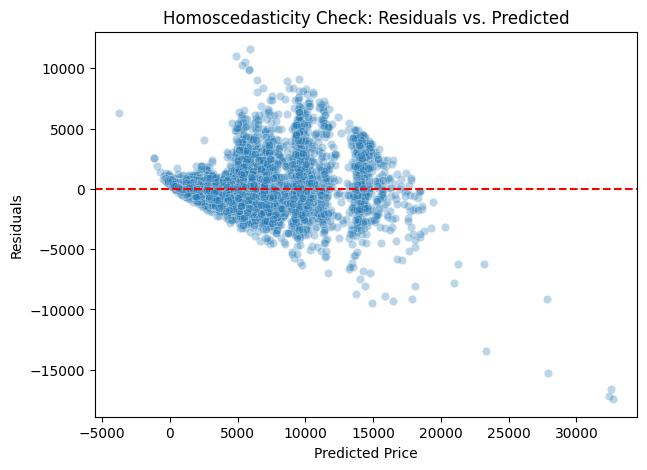

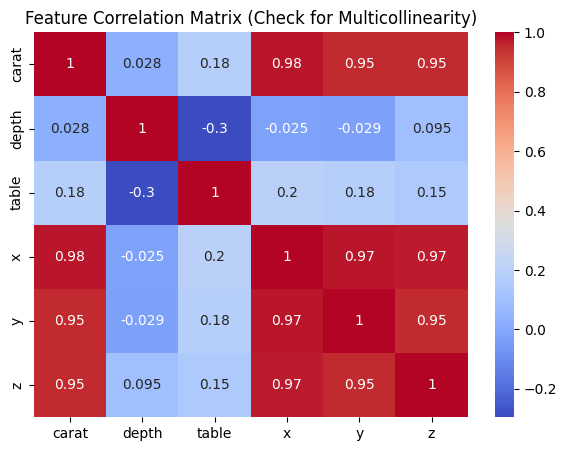

In [3]:
#Q3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load example dataset
df = sns.load_dataset('diamonds').dropna()

# Select features and target
features = ['carat', 'depth', 'table', 'x', 'y', 'z']
X = df[features]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# 1. Linearity: Actual vs. Predicted
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linearity Check: Actual vs. Predicted')
plt.show()

# 2. Homoscedasticity: Residuals vs. Predicted
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check: Residuals vs. Predicted')
plt.show()

# 3. Multicollinearity: Correlation Matrix
corr = X.corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix (Check for Multicollinearity)')
plt.show()


In [4]:
#Q4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
X = data.frame.drop('MedHouseVal', axis=1)
y = data.frame['MedHouseVal']

# For demonstration, let's add a categorical feature
X['CatFeature'] = pd.qcut(X['AveRooms'], q=4, labels=['A', 'B', 'C', 'D'])

# Identify numerical and categorical columns
num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

# Preprocessing for numerical data: impute and scale
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: impute and one-hot encode
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# List of regression models to compare
regressors = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(random_state=42)
}

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate each model
for name, reg in regressors.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', reg)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name}: MSE={mse:.3f}, RMSE={rmse:.3f}")


LinearRegression: MSE=0.546, RMSE=0.739
Ridge: MSE=0.546, RMSE=0.739
Lasso: MSE=1.311, RMSE=1.145
RandomForest: MSE=0.257, RMSE=0.507


In [5]:
#Q5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.

import numpy as np
from sklearn.linear_model import LinearRegression

# Example data
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

# Create and fit the model
model = LinearRegression()
model.fit(x, y)

# Print coefficient, intercept, and R-squared score
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-squared score:", model.score(x, y))


Coefficient: 0.54
Intercept: 5.633333333333329
R-squared score: 0.7158756137479542


Coefficient (slope): 0.105
Intercept: 0.920
R-squared score: 0.457


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


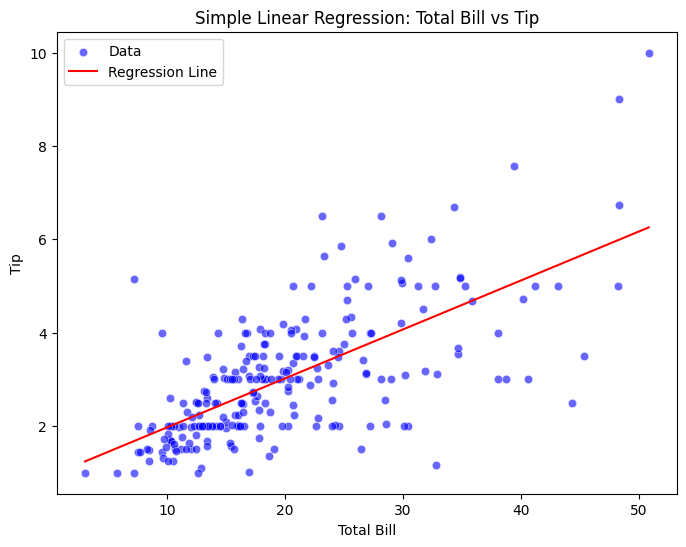

In [6]:
#Q6.Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the tips dataset
tips = sns.load_dataset('tips')

# Prepare the data
X = tips[['total_bill']]  # Predictor must be 2D
y = tips['tip']

# Fit the simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Print model parameters
print(f"Coefficient (slope): {model.coef_[0]:.3f}")
print(f"Intercept: {model.intercept_:.3f}")
print(f"R-squared score: {model.score(X, y):.3f}")

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips, color='blue', alpha=0.6, label='Data')
# Regression line
x_vals = np.linspace(X['total_bill'].min(), X['total_bill'].max(), 100)
y_vals = model.predict(x_vals.reshape(-1, 1))
plt.plot(x_vals, y_vals, color='red', label='Regression Line')
plt.title('Simple Linear Regression: Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend()
plt.show()


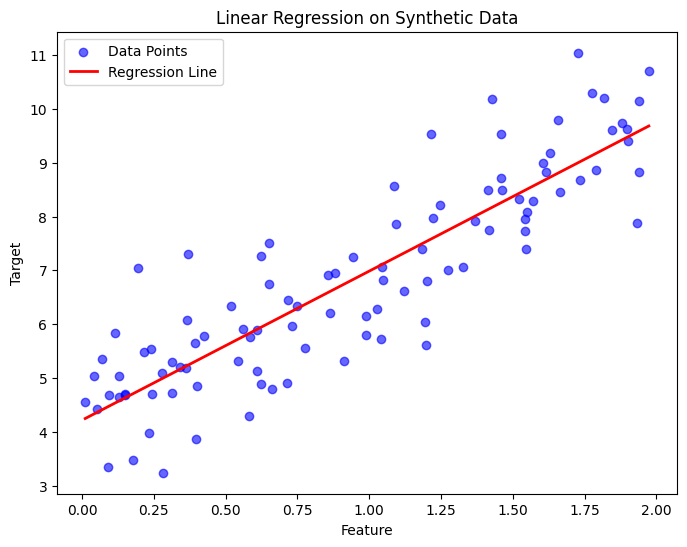

In [8]:
#Q7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X.flatten() + np.random.randn(100)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict new values for plotting the regression line
X_new = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_new)

# Plot data points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Data Points')
plt.plot(X_new, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression on Synthetic Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


In [9]:
#Q8. Write a Python script that pickles a trained linear regression model and saves it to a file.

import numpy as np
from sklearn.linear_model import LinearRegression
import pickle

# Generate some simple training data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Pickle (serialize) the trained model and save it to a file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model has been pickled and saved as 'linear_regression_model.pkl'")


Model has been pickled and saved as 'linear_regression_model.pkl'


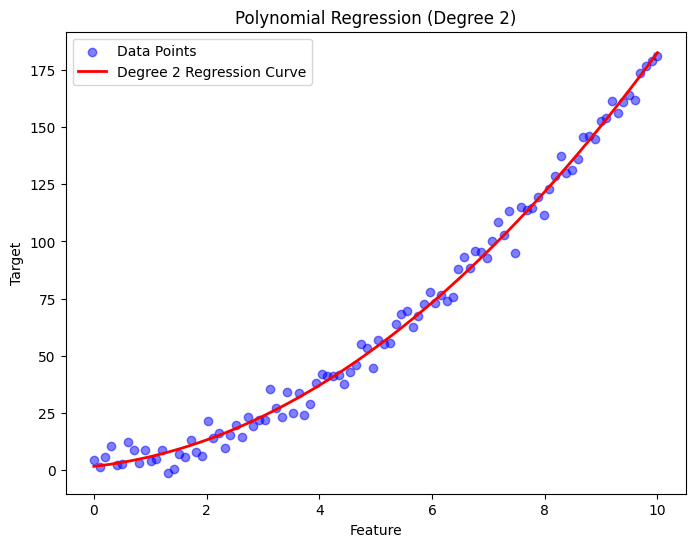

In [10]:
#Q9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic dataset
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 + 3 * X.flatten() + 1.5 * X.flatten()**2 + np.random.randn(100) * 5  # Quadratic with noise

# Transform features to polynomial (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict values for plotting the regression curve
y_pred = model.predict(X_poly)

# Plot the data points and the regression curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Degree 2 Regression Curve')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


In [11]:
#Q10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.

import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Generate synthetic data (one feature)
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Print model's coefficient and intercept
print(f"Coefficient (slope): {model.coef_[0]:.3f}")
print(f"Intercept: {model.intercept_:.3f}")


Coefficient (slope): 44.437
Intercept: 1.165


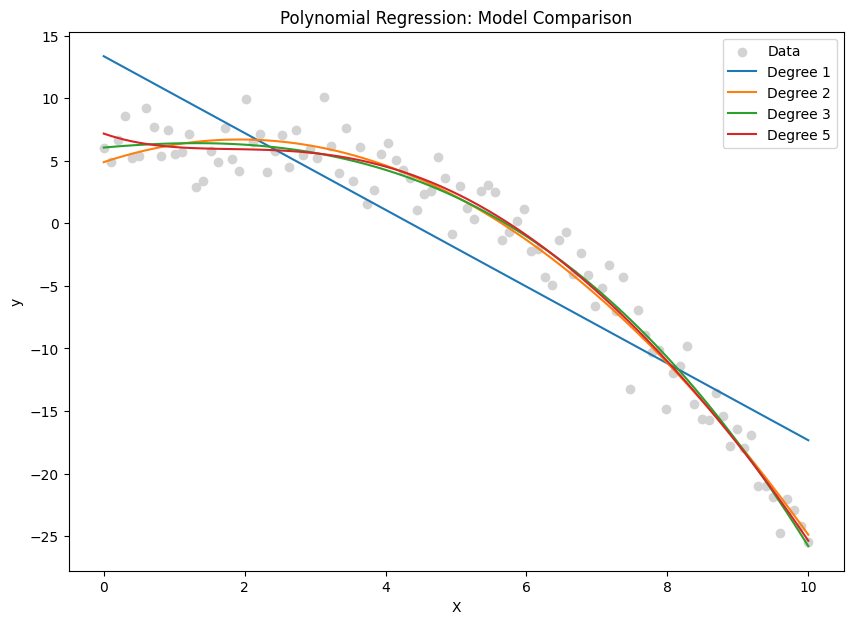

Degree	RMSE		R2
1	3.819		0.778
2	1.574		0.962
3	1.552		0.963
5	1.611		0.960


In [12]:
#Q11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 5 + 2 * X.flatten() - 0.5 * X.flatten()**2 + np.random.randn(100) * 2  # Quadratic relationship with noise

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = [1, 2, 3, 5]
results = {}

plt.figure(figsize=(10, 7))
plt.scatter(X, y, color='lightgray', label='Data')

# Fit and evaluate polynomial models of different degrees
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    y_pred_full = model.predict(poly.transform(X))

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[degree] = {'RMSE': rmse, 'R2': r2}

    plt.plot(X, y_pred_full, label=f'Degree {degree}')

plt.title('Polynomial Regression: Model Comparison')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Print performance comparison
print("Degree\tRMSE\t\tR2")
for degree in degrees:
    print(f"{degree}\t{results[degree]['RMSE']:.3f}\t\t{results[degree]['R2']:.3f}")


In [13]:
#Q12. Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate synthetic data with two features
X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Print model's coefficients, intercept, and R-squared score
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.3f}")
print(f"R-squared score: {model.score(X, y):.3f}")


Coefficients: [86.00258028 74.11675411]
Intercept: 0.216
R-squared score: 0.990


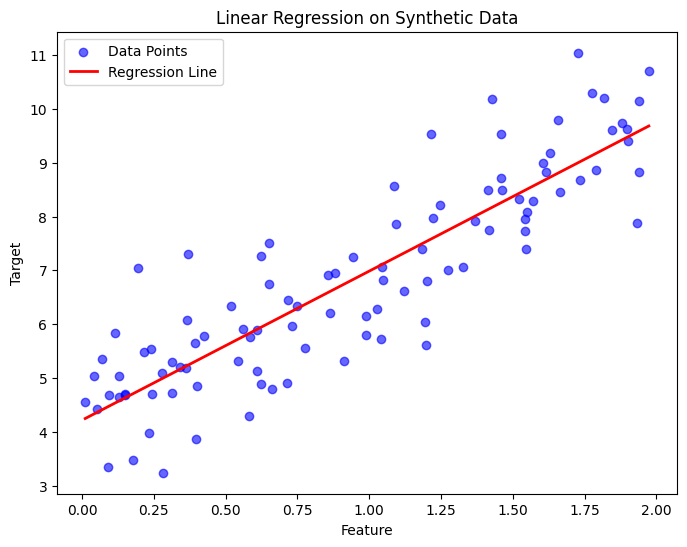

In [14]:
#Q13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X.flatten() + np.random.randn(100)  # Linear relationship with noise

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values for the regression line
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)

# Plot data points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Data Points')
plt.plot(X_line, y_line, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression on Synthetic Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


In [15]:
#Q14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Example: Generate synthetic dataset with multicollinearity
np.random.seed(42)
size = 100
X1 = np.random.rand(size)
X2 = 0.5 * X1 + np.random.rand(size) * 0.1  # Highly correlated with X1
X3 = np.random.rand(size)
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})

# Add a constant (intercept) as required for VIF calculation
X = add_constant(df)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


  Feature        VIF
0   const  11.112919
1      X1  26.949932
2      X2  27.028264
3      X3   1.023792


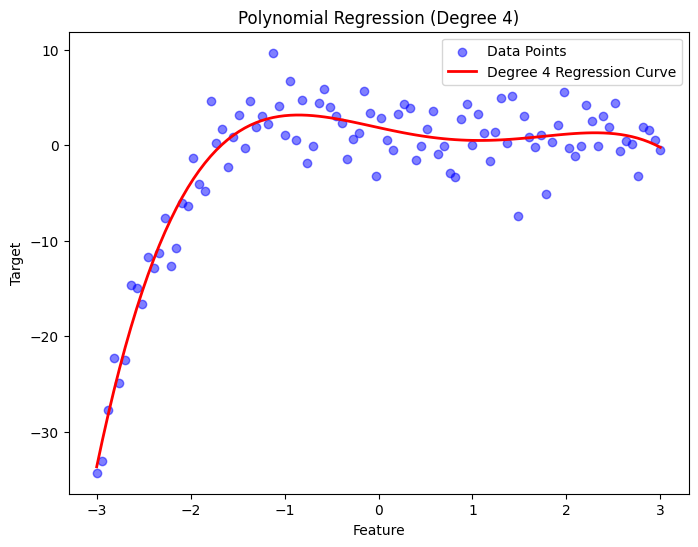

In [16]:
#Q15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data for a degree-4 polynomial relationship
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
# True relationship: y = 2 - 3*X + 0.5*X^2 + X^3 - 0.3*X^4 + noise
y = 2 - 3*X.flatten() + 0.5*X.flatten()**2 + X.flatten()**3 - 0.3*X.flatten()**4 + np.random.randn(100) * 3

# Transform features to polynomial features (degree 4)
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict for plotting the regression curve
y_pred = model.predict(X_poly)

# Plot the synthetic data and the fitted regression curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Degree 4 Regression Curve')
plt.title('Polynomial Regression (Degree 4)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


In [17]:
#Q16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score.

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline with standardization and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = pipeline.predict(X_test)

# Print R-squared score
print(f"R-squared score: {r2_score(y_test, y_pred):.4f}")


R-squared score: 0.5758


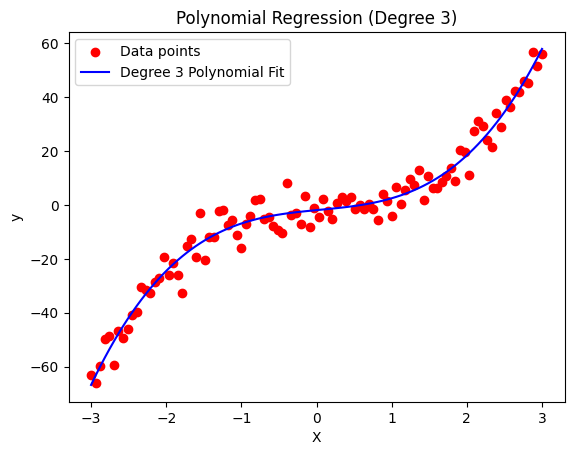

In [18]:
#Q17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic dataset
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
# True function: cubic relationship with some noise
y = 2 * X.flatten()**3 - X.flatten()**2 + 3 * X.flatten() + np.random.randn(100) * 5

# Transform features to polynomial (degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict values for plotting
y_pred = model.predict(X_poly)

# Plotting
plt.scatter(X, y, color='red', label='Data points')
plt.plot(X, y_pred, color='blue', label='Degree 3 Polynomial Fit')
plt.title('Polynomial Regression (Degree 3)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [19]:
#Q18.Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic dataset with 5 features
np.random.seed(42)
n_samples = 100
n_features = 5

X = np.random.randn(n_samples, n_features)
true_coef = np.array([1.5, -2.0, 3.0, 0.5, -1.0])
y = X @ true_coef + np.random.randn(n_samples) * 0.5  # Add some noise

# Fit multiple linear regression
model = LinearRegression()
model.fit(X, y)

# Predict and calculate R-squared
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Print results
print("R-squared score:", r2)
print("Model coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R-squared score: 0.9871443344700416
Model coefficients: [ 1.52710641 -1.93224448  2.98935295  0.58037361 -1.00361573]
Intercept: -0.07306236831451818


Slope: 2.97
Intercept: 4.22


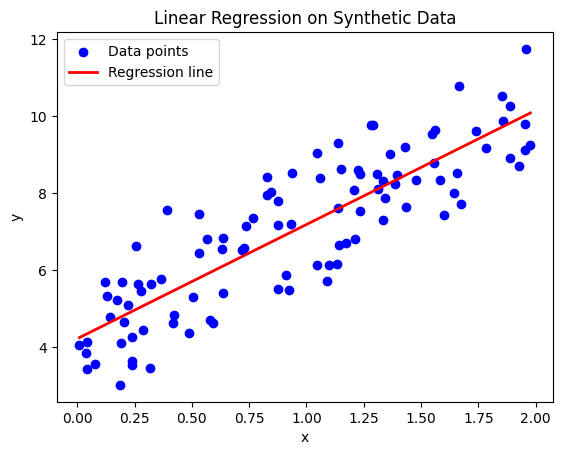

In [20]:
#Q19.Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic linear data
np.random.seed(0)
x = 2 * np.random.rand(100)
y = 4 + 3 * x + np.random.randn(100)  # y = 4 + 3x + noise

# Reshape x for sklearn
X = x.reshape(-1, 1)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values for the regression line
x_line = np.linspace(min(x), max(x), 100).reshape(-1, 1)
y_line = model.predict(x_line)

# Print model parameters
print(f"Slope: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

# Plot data and regression line
plt.scatter(x, y, color="blue", label="Data points")
plt.plot(x_line, y_line, color="red", linewidth=2, label="Regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression on Synthetic Data")
plt.legend()
plt.show()


In [21]:
#Q20.Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.

import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic dataset with 3 features
np.random.seed(0)
n_samples = 100
n_features = 3

X = np.random.rand(n_samples, n_features)
true_coefs = np.array([2.5, -1.7, 3.3])
y = X @ true_coefs + np.random.randn(n_samples) * 0.5  # Add noise

# Fit multiple linear regression
model = LinearRegression()
model.fit(X, y)

# Print R-squared score and coefficients
r2 = model.score(X, y)
print("R-squared score:", r2)
print("Model coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R-squared score: 0.8982587082894985
Model coefficients: [ 2.29566239 -1.71002168  3.42661549]
Intercept: -0.024893048765821213


In [22]:
#Q21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling

import joblib
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# --- Train a simple regression model ---
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)
model = LinearRegression()
model.fit(X, y)

# --- Serialize (save) the model using joblib ---
model_filename = 'linear_regression_model.joblib'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

# --- Deserialize (load) the model using joblib ---
loaded_model = joblib.load(model_filename)
print("Model loaded successfully.")

# --- Use the loaded model for prediction ---
y_pred = loaded_model.predict(X[:5])
print("Predictions on first 5 samples:", y_pred)


Model saved to linear_regression_model.joblib
Model loaded successfully.
Predictions on first 5 samples: [-55.86323862 -79.55987869 213.74419677  36.11958269  77.47491522]


In [23]:
#Q22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset.

import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Select features and target
# We'll use 'total_bill' (numeric), 'sex' and 'day' (categorical) to predict 'tip'
features = ['total_bill', 'sex', 'day']
target = 'tip'

# One-hot encode categorical features
X = pd.get_dummies(tips[features], drop_first=True)
y = tips[target]

# Split into train and test sets (optional, but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R-squared score:", r2)
print("Model coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef:.4f}")
print("Intercept:", model.intercept_)


R-squared score: 0.42956283226359604
Model coefficients:
  total_bill: 0.1103
  sex_Female: -0.0252
  day_Fri: -0.0760
  day_Sat: -0.1814
  day_Sun: -0.0337
Intercept: 0.9353782855499886


In [24]:
#Q23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
X = np.random.randn(100, 5)
true_coefs = np.array([2.5, -1.7, 0.0, 3.3, 0.5])
y = X @ true_coefs + np.random.randn(100) * 0.5  # Add noise

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_r2 = lr.score(X_test, y_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_r2 = ridge.score(X_test, y_test)

# Print results
print("Linear Regression coefficients:", lr.coef_)
print("Linear Regression R-squared:", lr_r2)
print()
print("Ridge Regression coefficients:", ridge.coef_)
print("Ridge Regression R-squared:", ridge_r2)


Linear Regression coefficients: [ 2.51904125 -1.66308278  0.10587721  3.30786125  0.41462753]
Linear Regression R-squared: 0.9927761746736375

Ridge Regression coefficients: [ 2.4828177  -1.63960324  0.09991882  3.25801589  0.4063526 ]
Ridge Regression R-squared: 0.9927133103480984


In [25]:
#Q24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Generate a synthetic dataset
np.random.seed(0)
X = np.random.rand(100, 3)
true_coefs = [2.0, -1.5, 3.0]
y = X @ true_coefs + np.random.randn(100) * 0.2  # Add noise

# Initialize Linear Regression model
model = LinearRegression()

# Perform 5-fold cross-validation and evaluate R-squared
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-validated R-squared scores:", cv_scores)
print("Mean R-squared score:", np.mean(cv_scores))


Cross-validated R-squared scores: [0.97713393 0.97940163 0.96251537 0.96236723 0.98827649]
Mean R-squared score: 0.9739389299392934


In [26]:
#Q25. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2 * X.flatten()**3 - X.flatten()**2 + 3 * X.flatten() + np.random.randn(100) * 5

degrees = [1, 2, 3, 4, 5]

print("Degree\tR-squared Score")
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict and calculate R-squared
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)

    print(f"{degree}\t{r2:.4f}")


Degree	R-squared Score
1	0.8610
2	0.8619
3	0.9684
4	0.9684
5	0.9687
